<a href="https://colab.research.google.com/github/davialvesguerra/trainee-iee/blob/main/2%C2%BA_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv('gdrive/My Drive/iee/2º Período/OnlineNewsPopularity.csv')

In [3]:
data1 = pd.read_csv('gdrive/My Drive/iee/2º Período/url_spam_classification.csv')

# Analisando o dataset

In [4]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


O primeiro problema apresentado é o das colunas que tem um espaço na frente: 

In [5]:
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

renomeando: 

In [6]:
name_columns = [ _.strip() for _ in df.columns]

df = df.set_axis(name_columns, axis=1)

print(df.columns)

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [7]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

Verificando os tipos das colunas é possível observar que a maioria apresenta os dados como no tipo numérico, mas observando a quantidade de valores únicos em cada coluna é visível que algumas delas apresentam valores binários, dando a entender que possam ser variáveis categóricas

In [8]:
[[x,df[x].nunique()] for x in df]

[['url', 39644],
 ['timedelta', 724],
 ['n_tokens_title', 20],
 ['n_tokens_content', 2406],
 ['n_unique_tokens', 27281],
 ['n_non_stop_words', 1451],
 ['n_non_stop_unique_tokens', 22930],
 ['num_hrefs', 133],
 ['num_self_hrefs', 59],
 ['num_imgs', 91],
 ['num_videos', 53],
 ['average_token_length', 30136],
 ['num_keywords', 10],
 ['data_channel_is_lifestyle', 2],
 ['data_channel_is_entertainment', 2],
 ['data_channel_is_bus', 2],
 ['data_channel_is_socmed', 2],
 ['data_channel_is_tech', 2],
 ['data_channel_is_world', 2],
 ['kw_min_min', 26],
 ['kw_max_min', 1076],
 ['kw_avg_min', 17003],
 ['kw_min_max', 1021],
 ['kw_max_max', 35],
 ['kw_avg_max', 30834],
 ['kw_min_avg', 15982],
 ['kw_max_avg', 19438],
 ['kw_avg_avg', 39300],
 ['self_reference_min_shares', 1255],
 ['self_reference_max_shares', 1137],
 ['self_reference_avg_sharess', 8626],
 ['weekday_is_monday', 2],
 ['weekday_is_tuesday', 2],
 ['weekday_is_wednesday', 2],
 ['weekday_is_thursday', 2],
 ['weekday_is_friday', 2],
 ['weekda

Afim de trabalhar somente com as variáveis numéricas, vamos transformar essas possíveis variáveis categóricas em strings

In [9]:
chars_cols = [x for x in df if df[x].nunique() == 2]
num_cols = [x for x in df if (df[x].nunique() != 2) ]

#retirando a primeira coluna, pois é a coluna de url
num_cols = num_cols[1:]


df.loc[:,chars_cols] = df.loc[:,chars_cols].astype(str)

df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,1200.000000,2800.000000,2200.000000,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,2600.000000,8000.000000,5200.000000,0.240958,0.150831,0.334218,0.375763,0.399986,0.508333,0.177832,0.050279,0.021739,0

Agora vamos normalizar os dados afim de poder trabalhar melhor com eles.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

scaler.fit(df.loc[:,num_cols])

vars_num = scaler.transform(df.loc[:,num_cols])

É possível observar que existem 46 variáveis numéricas que podemos utilizar, mas aplicando um técnica de redimensionamento, podemos trabalhar com menos variáveis 

In [12]:
vars_num.shape

(39644, 46)

A técnica na qual vamos usar se chama: PCA(ou análise de componentes principais , em português). Dar uma breve resumida


In [13]:
from sklearn.decomposition import PCA

In [14]:
model = PCA()

pca_features = model.fit_transform(vars_num)
print(pca_features)


[[-1.34164962e+00 -2.75414598e+00 -1.98998452e+00 ...  1.29433169e-02
   6.53309770e-04 -2.06420227e-06]
 [ 3.52431841e-01 -4.41525147e+00 -1.48825995e+00 ...  1.33948474e-02
  -7.12618630e-03 -4.91703646e-06]
 [-3.69120472e+00 -3.76483432e+00 -1.52727072e+00 ... -1.29539759e-02
   1.51508934e-02  2.47414439e-06]
 ...
 [ 3.41307124e-01  2.69902231e+00 -3.66800587e-01 ... -6.46153873e-03
  -9.16023801e-03 -4.10971201e-06]
 [ 2.90347810e+00  2.68430149e-01 -2.97765022e+00 ...  5.42918033e-03
   3.80010620e-03 -5.95836214e-07]
 [ 1.00914722e+00  2.88874215e-01  1.96829095e+00 ...  1.33264567e-02
   7.53468679e-05  5.76988014e-07]]


Se estivessemos trabalhando somente com duas dimensões, o gráfico ficaria o seguinte:

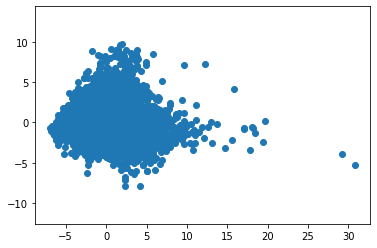

In [15]:
xs = pca_features[:,1]
ys = pca_features[:,10]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()


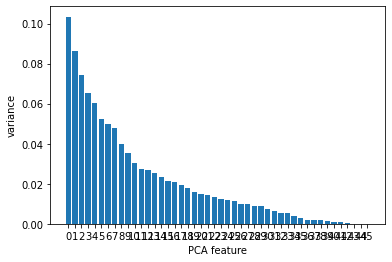

In [16]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Essa figura mostra o quanto a variância de cada variável representa no todo

In [92]:
variancia_raio = model.explained_variance_ratio_

total_vars = len(variancia_raio)
nivel_signif = 1 - 0.05

reduc_vars = list(filter(lambda x: sum(variancia_raio[0:x]) > nivel_signif, range(total_vars)))
total_reduc_vars = total_vars - len(reduc_vars)
print(f"Total de variáveis:\n{total_vars}.\nTotal de variáveis depois de aplicar um nível de significância de {round(1-nivel_signif,2)}:\n{total_reduc_vars}.")


Total de variáveis:
46.
Total de variáveis depois de aplicar um nível de significância de 0.05:
29.


Ou seja, basicamente consigo explicar 95% dos meus dados usando 29 das 46 variáveis numéricas.


## Predição

Para fazermos a predição de quantas visualizações o artigo terá, vamos utilizar as variáveis redimensionadas e a técnica de regressão linear. Para isso vamos importar a função e dividir os dados para treino e teste.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [85]:
#vamos usar uma quantidade de variáveis que represente 95% das variáveis numéricas
pca = PCA(n_components=18)

X = pca.fit_transform(vars_num)
y = df['shares']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Para verificar se os dados predizidos se assemelham aos reais podemos utilizar uma técnica que mensure o quanto se diferem os dados, para isso vamos utilizar o erro quadrático médio e o indicador R^2


In [83]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [88]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Raiz do erro quadrático médio: {}".format(rmse))

R^2: 0.994069485195024
Raiz do erro quadrático médio: 845.9586877361578
